In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D ,Input
from keras.layers import MaxPool2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import pandas as pd
import keras.backend as K
import cv2

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

img_path = 'a.jpg'

def get_img_array(img_path, size):

    img = keras.preprocessing.image.load_img(img_path, target_size=size)

    array = keras.preprocessing.image.img_to_array(img)

    array = np.expand_dims(array, axis=0)
    return array

In [5]:

img_array = preprocess_input(get_img_array(img_path, size=img_size))

model = model_builder(weights="imagenet")

preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02690373', 'airliner', 0.8209318)]


In [6]:
last_conv_layer = model.get_layer(last_conv_layer_name)
last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

In [7]:
classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
x = classifier_input
for layer_name in classifier_layer_names:
    x = model.get_layer(layer_name)(x)
classifier_model = keras.Model(classifier_input, x)

In [83]:
activations = last_conv_layer_model.predict(img_array) 
last_layer_activation = activations[-1]
last_layer_activation = np.expand_dims(last_layer_activation,axis=0)
print(last_layer_activation.shape)

(1, 10, 10, 2048)


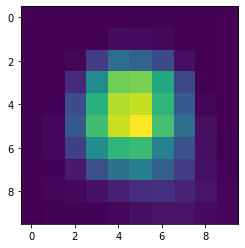

In [84]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

In [85]:
np.argmax(classifier_model(last_layer_activation))

834

In [86]:
values = []
for i in range(2048):
  activations = last_conv_layer_model.predict(img_array) 
  last_layer_activation = activations[-1]
  activation = last_layer_activation
  activation = np.expand_dims(activation,axis=0)
  for j in range(10):
    for k in range(10):
      activation[0][j][k][i]=0.
  prediction = classifier_model(activation)
  a= prediction[0][404]
  values.append(a.numpy())
values

[6.386616e-05,
 6.43901e-05,
 6.524878e-05,
 6.406217e-05,
 6.4524436e-05,
 6.430073e-05,
 6.392342e-05,
 6.398187e-05,
 6.15624e-05,
 6.3961204e-05,
 6.4587395e-05,
 6.425336e-05,
 6.4056716e-05,
 6.4315704e-05,
 6.318653e-05,
 6.5998676e-05,
 6.40638e-05,
 6.288123e-05,
 6.406875e-05,
 6.510619e-05,
 6.417053e-05,
 6.4061e-05,
 6.8458445e-05,
 6.4107924e-05,
 6.407024e-05,
 6.328207e-05,
 6.5277294e-05,
 6.4141685e-05,
 6.4049e-05,
 6.350516e-05,
 6.485795e-05,
 6.4052954e-05,
 6.406357e-05,
 6.406351e-05,
 6.402327e-05,
 6.4472675e-05,
 6.398915e-05,
 6.590809e-05,
 6.340759e-05,
 6.36688e-05,
 6.4089276e-05,
 6.407654e-05,
 6.343964e-05,
 6.406827e-05,
 6.3877764e-05,
 6.463835e-05,
 6.3875304e-05,
 6.406351e-05,
 6.455154e-05,
 6.646749e-05,
 6.412287e-05,
 6.479169e-05,
 6.402862e-05,
 6.407035e-05,
 6.491343e-05,
 6.406351e-05,
 6.406351e-05,
 6.369108e-05,
 6.406351e-05,
 6.401059e-05,
 6.7696084e-05,
 6.210842e-05,
 6.406334e-05,
 6.517401e-05,
 6.410884e-05,
 6.416264e-05,
 6

In [87]:
aero = 0.8209318
aero = [aero]*2048
weight_ratio = []
for i in range(2048):
  b = (float(aero[i]) - float(values[i]))/float(aero[i])
  weight_ratio.append(b)
weight_ratio

[0.9999222028448671,
 0.9999215646168099,
 0.9999205186353852,
 0.999921964074365,
 0.9999214009783622,
 0.9999216734816235,
 0.9999221330926826,
 0.9999220618958212,
 0.9999250091161744,
 0.9999220870668765,
 0.9999213242864115,
 0.9999217311800633,
 0.9999219707216507,
 0.9999216552414716,
 0.9999230307155537,
 0.999919605165385,
 0.9999219620890423,
 0.9999234026178937,
 0.9999219560621699,
 0.9999206923245288,
 0.9999218320858602,
 0.9999219655013156,
 0.9999166088526112,
 0.9999219083435217,
 0.9999219542452452,
 0.9999229143437388,
 0.9999204839011017,
 0.9999218672189809,
 0.9999219801164811,
 0.9999226425849734,
 0.9999209947139867,
 0.9999219753038463,
 0.9999219623726598,
 0.9999219624435642,
 0.9999220114650804,
 0.9999214640300829,
 0.9999220530239106,
 0.9999197155103275,
 0.9999227614384417,
 0.9999224432550331,
 0.9999219310595127,
 0.999921946569846,
 0.9999227223967171,
 0.9999219566471311,
 0.9999221887083062,
 0.9999212622184891,
 0.9999221917040163,
 0.9999219624435

In [88]:
last_layer_activation = np.expand_dims(last_layer_activation,axis=0)
for i in range(2048):
  for  j in range(10):
    for k in range(10):
      last_layer_activation[0][j][k][i]=last_layer_activation[0][j][k][i]*weight_ratio[i]

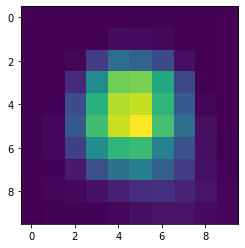

In [89]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

In [90]:
heatmap=heatmap[0,:,:,]
heatmap.shape

(10, 10)

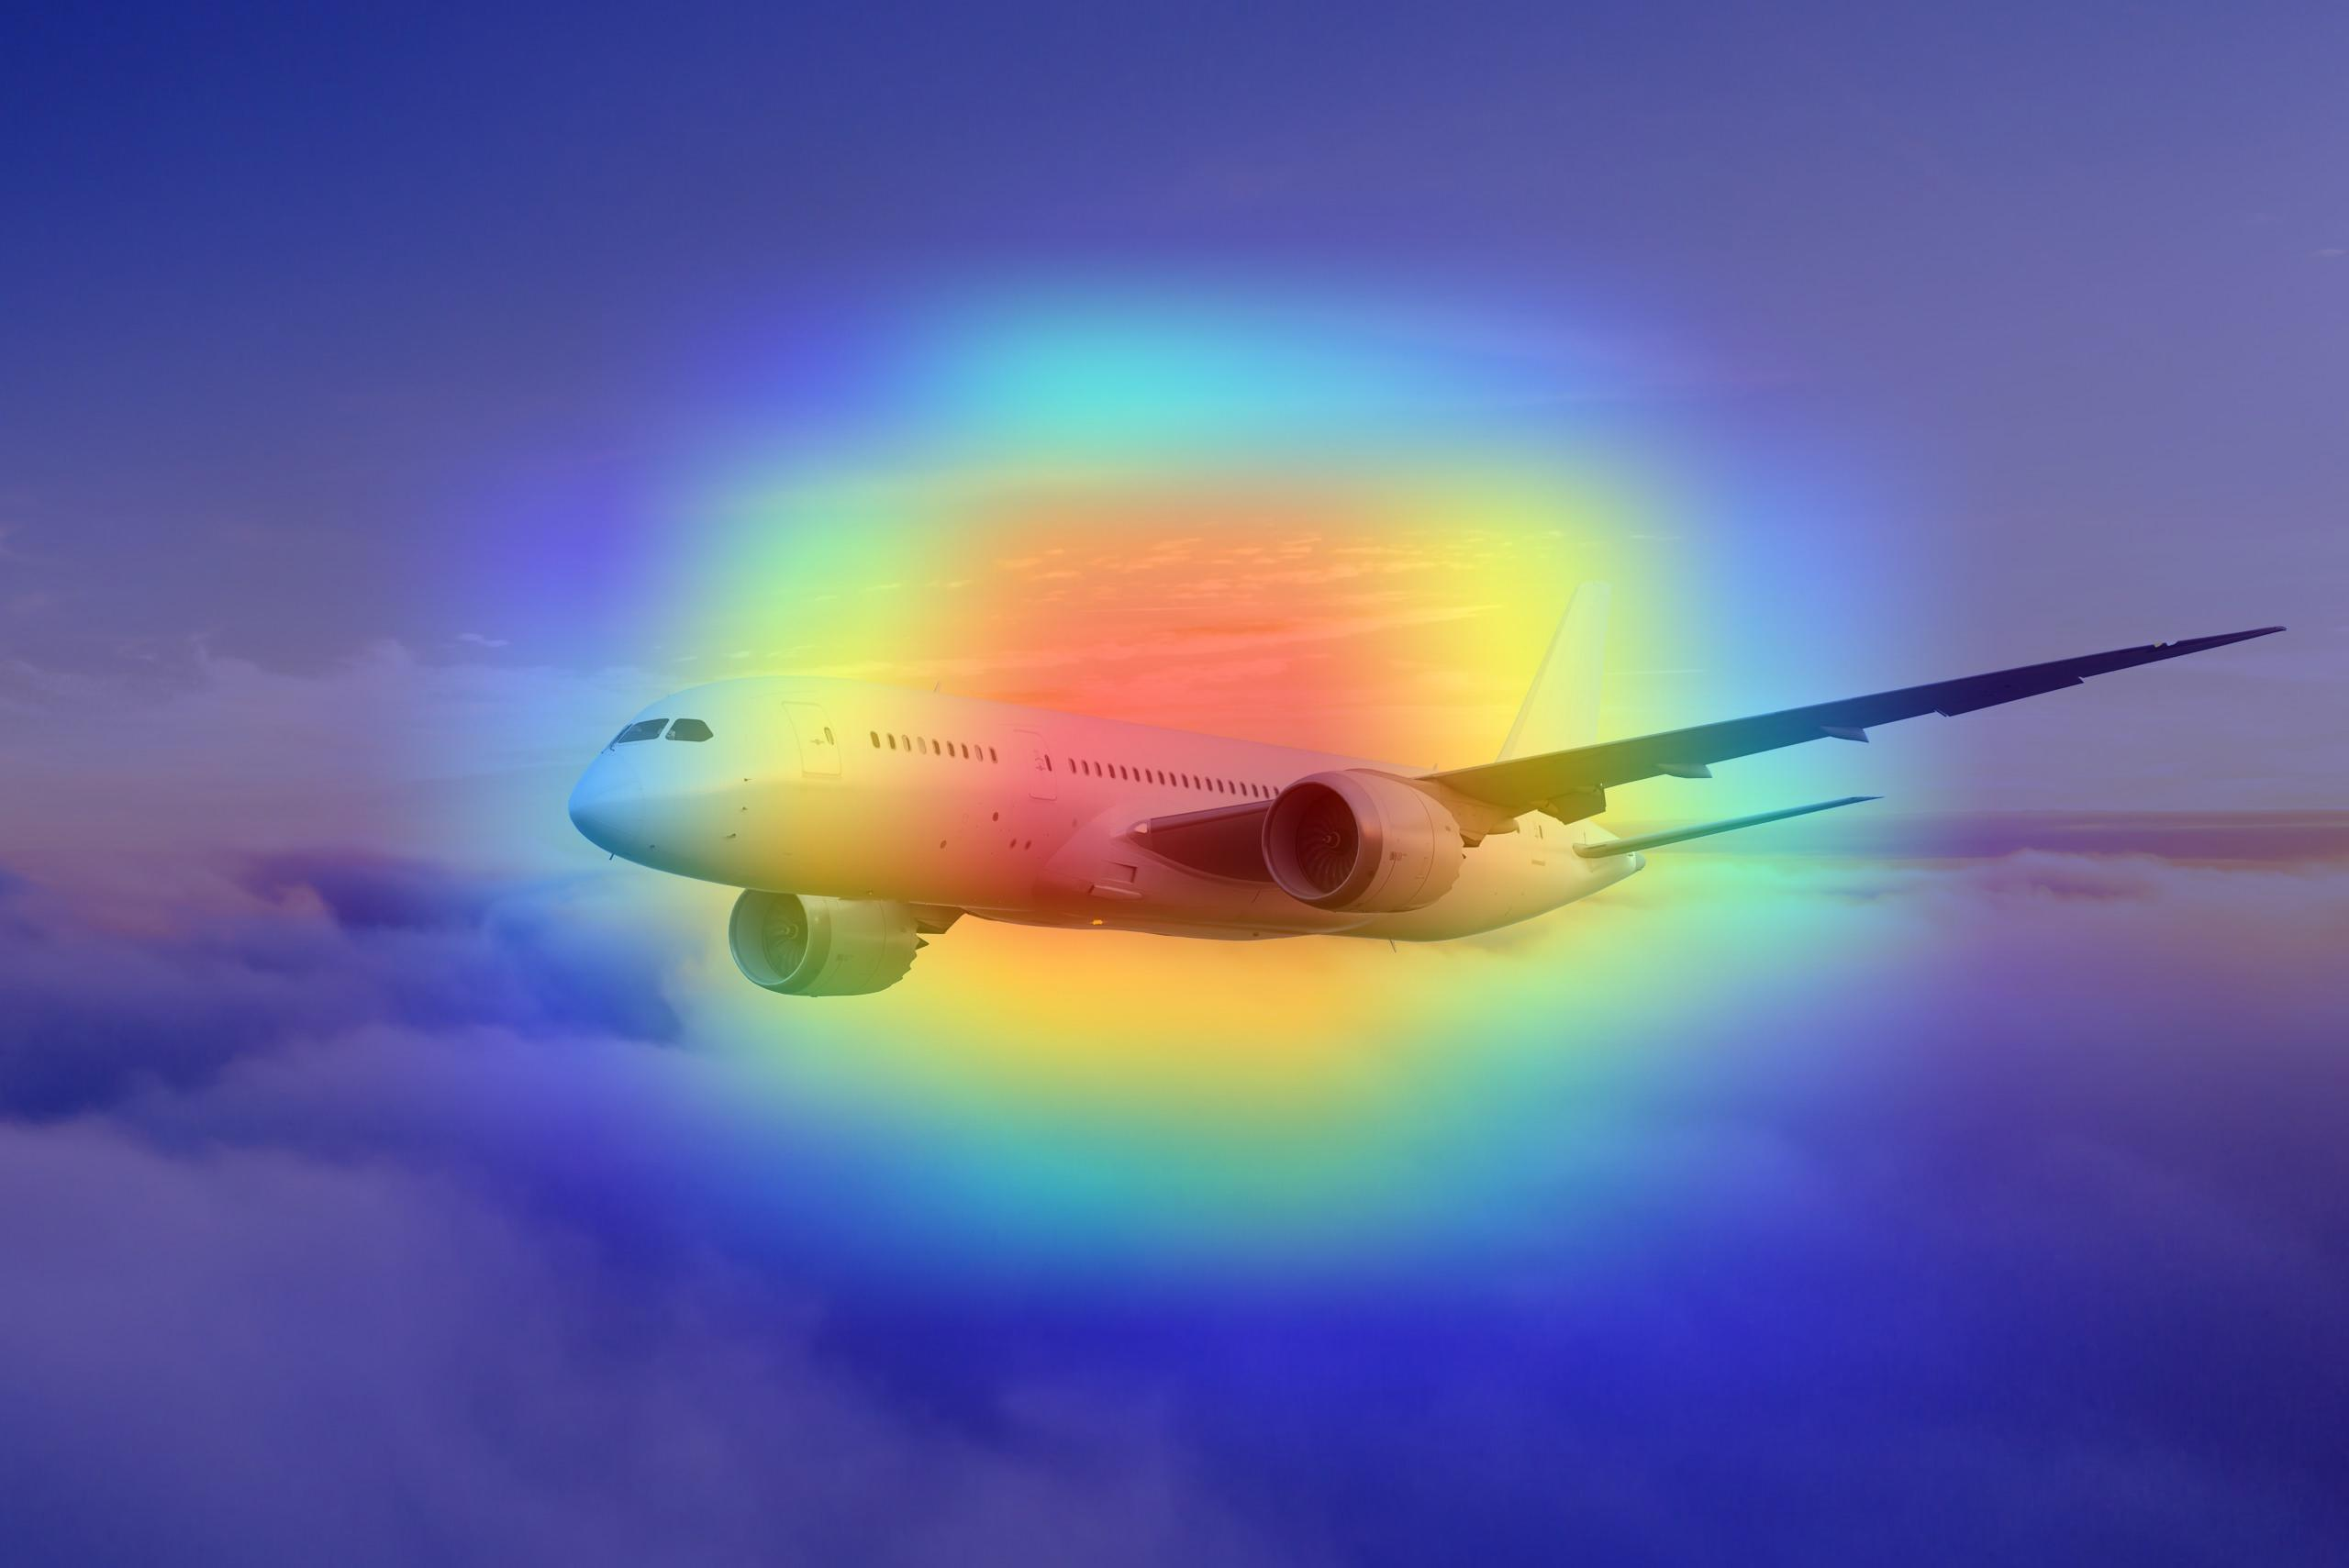

In [91]:
img = keras.preprocessing.image.load_img('a.jpg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap  + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_aeroplane.jpg"
superimposed_img.save(save_path)
display(Image(save_path))

# Trying out on other classes

(1, 10, 10, 2048)


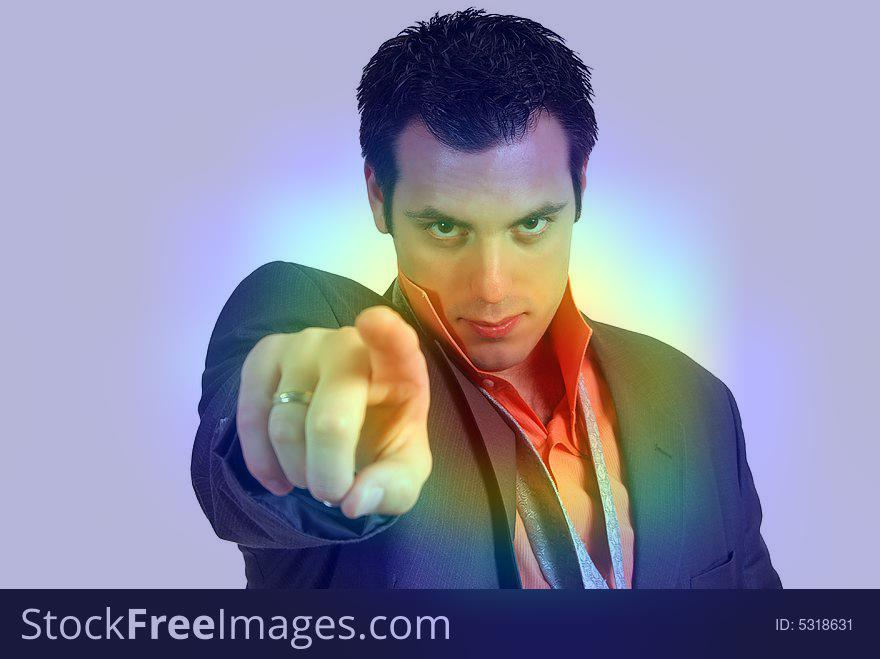

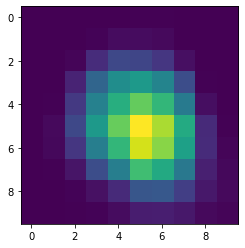

In [80]:
img_path = 'man.jpg'
img_array = preprocess_input(get_img_array(img_path, size=img_size))
activations = last_conv_layer_model.predict(img_array) 
last_layer_activation = activations[-1]
last_layer_activation = np.expand_dims(last_layer_activation,axis=0)
print(last_layer_activation.shape)

class_number = np.argmax(model.predict(img_array))
prediction = model.predict(img_array)
predicted_value = prediction[0][class_number]

values = []
for i in range(2048):
  activations = last_conv_layer_model.predict(img_array) 
  last_layer_activation = activations[-1]
  activation = last_layer_activation
  activation = np.expand_dims(activation,axis=0)
  for j in range(10):
    for k in range(10):
      activation[0][j][k][i]=0.
  prediction = classifier_model(activation)
  a= prediction[0][class_number]
  values.append(a.numpy())

aero = predicted_value
aero = [aero]*2048
weight_ratio = []
for i in range(2048):
  b = (float(aero[i]) - float(values[i]))/float(aero[i])
  weight_ratio.append(b)

last_layer_activation = np.expand_dims(last_layer_activation,axis=0)
for i in range(2048):
  for  j in range(10):
    for k in range(10):
      last_layer_activation[0][j][k][i]=last_layer_activation[0][j][k][i]*weight_ratio[i]


heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap *0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_dog.jpg"
superimposed_img.save(save_path)
display(Image(save_path))